In [1]:
import gym
import gym_gvgai
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from abstractclasses.AbstractNeighborhoodPattern import CrossNeighborhoodPattern, SquareNeighborhoodPattern
from models.localforwardmodel import LocalForwardModel
import random
from games.TileMapVisualizer import TileMapVisualizer
from games.GVGAIConstants import GVGAIConstants
from games.gvgai_environment import GVGAIEnvironment

from matplotlib import animation
from IPython.display import HTML



In [2]:
class RandomAgent:

    def __init__(self):
        self.name = "randomAgent"

    def act(self, stateObs, actions):
        action_id = random.choice(actions)
        return action_id

In [4]:
game = "painter"
level = 0
version = 0

In [9]:
env = GVGAIEnvironment(game, level, version)

strings = set()

for i in range(30):
    _, _, _, sso = env.step(random.choice(env.get_actions()))
    strings = strings.union({obj for s in sso.observationString.split("\n") for obj in s.split(",")})
print(strings)

Connecting to host 127.0.0.1 at port 53341 ...
Client connected to server [OK]
{'ground', 'ground preground', 'paint prepaint', 'paint', 'avatar paint preground', 'avatar ground prepaint'}


Connecting to host 127.0.0.1 at port 48075 ...
Client connected to server [OK]


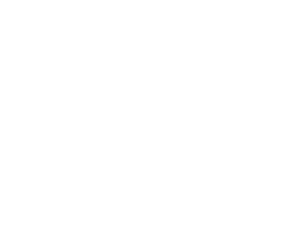

In [5]:
env = GVGAIEnvironment(game, level, version)
agent = RandomAgent()
done = False


fig, axis = plt.subplots(1, 1)
plt.axis("off")

ims = []

tick = 0
obs, score, is_done, sso = env.reset()
while not done:
    tick += 1
    ttl = axis.text(0.5, 1.01, f"{game} | score = {score} | tick = {tick}", horizontalalignment='center', verticalalignment='bottom', transform=axis.transAxes)
    ims.append([plt.imshow(sso.image), ttl])
    
    action = agent.act(obs, env.get_actions())
    obs, score, is_done, sso = env.step(action)
    if is_done or tick == 100:
        ims.append([plt.imshow(sso.image), ttl])
        break
      
anim = animation.ArtistAnimation(fig, ims, interval=100, blit=False, repeat=False)
anim.save('dynamic_images.mp4')
HTML(anim.to_html5_video())

In [6]:
"""
class RHEAAgent:

    def __init__(self):
        self.name = "RHEAAgent"

    def act(self, stateObs, actions):
        action_id = random.choice(actions)
        return action_id
""" 

In [29]:
forward_model = LocalForwardModel(DecisionTreeClassifier(),
    CrossNeighborhoodPattern(2),
    possibleObservations=np.append(np.array(list(GVGAIConstants.get_object_dict(game).values())), np.array(["0", "1", "2", "3", "4", "x"])))

from games.gvgai_environment import train_model
train_model(forward_model, game, levels=[0,1,2], version=0, rep=1, ticks = 200)

Connecting to host 127.0.0.1 at port 33877 ...
Client connected to server [OK]
Connecting to host 127.0.0.1 at port 34207 ...
Client connected to server [OK]
Connecting to host 127.0.0.1 at port 46547 ...
Client connected to server [OK]


In [8]:
print(forward_model.get_data_set())

[['A' 'G' 'g' ... 'x' '2' 'g']
 ['A' 'G' 'g' ... 'g' '3' 'g']
 ['A' 'G' 'g' ... 'x' '4' 'p']
 ...
 ['x' 'x' 'x' ... 'p' '2' 'p']
 ['x' 'x' 'x' ... 'p' '3' 'p']
 ['x' 'x' 'x' ... 'p' '4' 'p']]


In [ ]:
import os

def read_sprite_set(game):
    sprite_set = dict()
    with open(f"data/GVGAI/games/{game}.txt") as file:
        while "SpriteSet" not in file.readline():
            continue
        while True:
            line = file.readline()
            if "InteractionSet" in line:
                break
            if "img" not in line:
                continue
            strings = line.lstrip().rstrip().split(" ")
            for string in strings:
                if string.startswith("img"):
                    if "autotiling" in line:
                        if string.split("=")[1].split("/")[1] == "dirtwall":
                            sprite_set[strings[0]] = "sprites/" + "oryx/dirtWall" + "_15.png"
                        else:
                            sprite_set[strings[0]] = "sprites/" + string.split("=")[1] + "_15.png"
                    else:
                        if os.path.isfile("sprites/" + string.split("=")[1] + ".png"):
                            sprite_set[strings[0]] = "sprites/" + string.split("=")[1] + ".png"
                        else:
                            sprite_set[strings[0]] = "sprites/" + string.split("=")[1] + "_0.png"
    return sprite_set

In [ ]:
game = "painter"
print(os.getcwd())
tiles = read_sprite_set("painter")
print(tiles)
print(GVGAIConstants.get_object_dict(game).items())
images = {y: [tiles[s] for s in sorted(x.split(" "), reverse=True) if s in tiles] for x, y in GVGAIConstants.get_object_dict(game).items()}
print(images)


Connecting to host 127.0.0.1 at port 39459 ...
Client connected to server [OK]


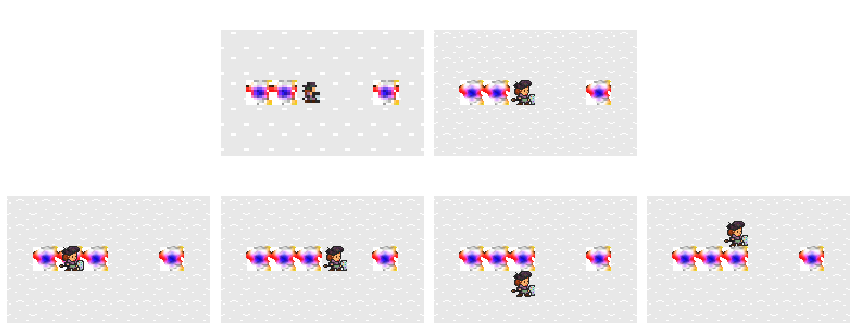

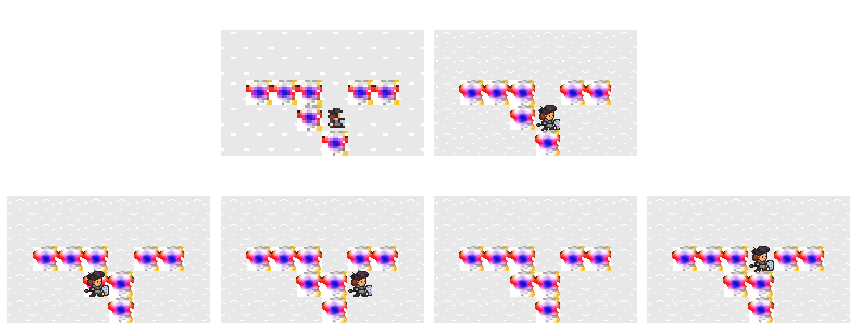

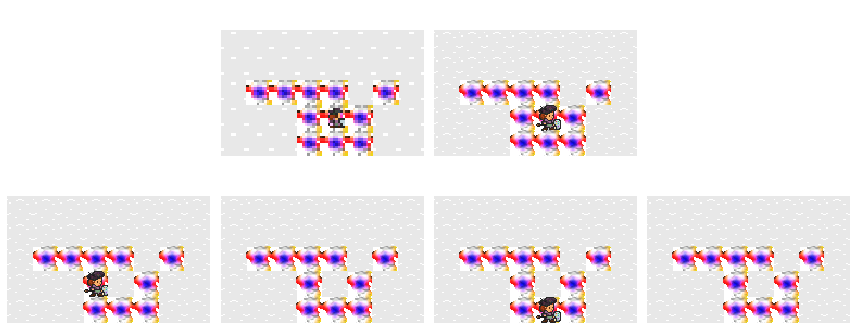

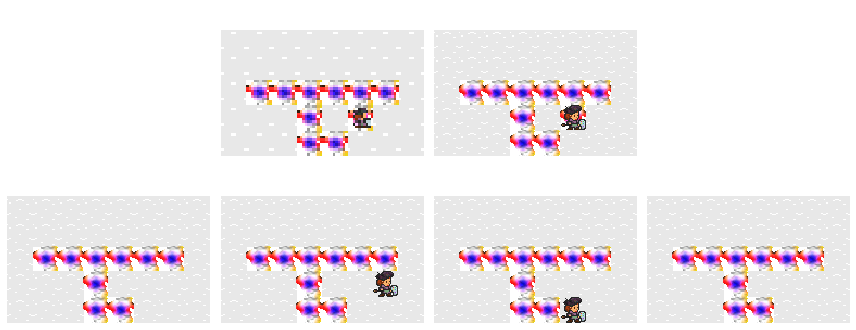

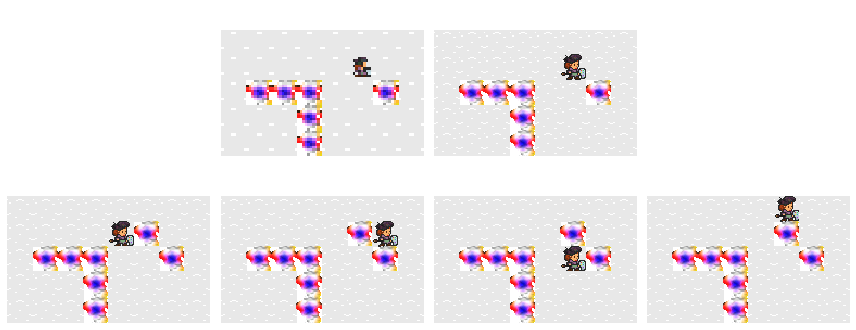

In [30]:
game = "painter"
env = GVGAIEnvironment("painter", 1, version)
a, b, c, d = env.step(0)
width = a.get_grid().shape[0]
height = a.get_grid().shape[1]

for i in range(5):
    fig, ax = plt.subplots(2, 4)
    fig.set_figheight(5)
    fig.set_figwidth(12)
    
    ax[0, 1].imshow(d.image)
    ax[0, 1].set_axis_off()
    tsv = TileMapVisualizer(images, 24)
    tsv.visualize_observation_grid(a.get_grid(), width, height, axis=ax[0, 2])
    
    for action in range(1, 5):
        pred = forward_model.predict(a.get_grid(), action).reshape(width, height)
        tsv.visualize_observation_grid(pred, width, height, axis=ax[1, action-1])
    ax[0, 0].set_axis_off()
    ax[0, 3].set_axis_off()
    plt.tight_layout()
    plt.show()
    
    for j in range(10):
        a, b, c, d = env.step(random.choice(range(5)))

In [31]:
env = GVGAIEnvironment("painter", 1, version)
a, _, _, d = env.step(0) 

Connecting to host 127.0.0.1 at port 51025 ...
Client connected to server [OK]


In [50]:
from abstractclasses.AbstractGameState import AbstractGameState
from abstractclasses.AbstractGrid import AbstractGrid
from abstractclasses.AbstractForwardModel import AbstractForwardModel
import copy

class ForwardModelEnvironment(AbstractGameState):
        
    def __init__(self, fm: AbstractForwardModel, state: AbstractGrid):
        self.fm = fm
        self.state = state
        self.width = state.get_width()
        self.height = state.get_height()
        self._tick = 0

        super().__init__()

    def get_tick(self):
        return self._tick

    def next(self, action):
        self.state.force_set_grid(forward_model.predict(a.get_grid(), action).reshape(self.width, self.height))

    def get_actions(self):
        return [1, 2, 3, 4]
    
    def get_random_action(self):
        return random.choice(self.get_actions)

    def get_score(self):
        return self.width * self.height - np.sum(self.state.get_grid() == "g")

    def is_terminal(self):
        return "g" not in self.state().grid
            
    def deep_copy(self):
        return copy.deepcopy(self)


fms = ForwardModelEnvironment(forward_model, a.deep_copy())
print(fms.state, fms.get_score())
fms.next(2)
fms.next(2)
print(fms.state, fms.get_score())

gggggggg
gggggggg
gppAggpg
gggggggg
gggggggg
 4
gggggggg
gggggggg
gppPAgpg
gggggggg
gggggggg
 5


In [55]:
num_evals = 50
rollout_length = 10
mutation_probability = 0.1

from agents.RHEA import RHEAAgent

game = ForwardModelEnvironment(forward_model, a.deep_copy())
rhea = RHEAAgent(game, rollout_length, mutation_probability, num_evals)

rhea._get_next_action()


ValueError: y contains previously unseen labels: ['<']